In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
import matplotlib
# myfont = matplotlib.font_manager.FontProperties(fname=r'C:/Windows/Fonts/msyh.ttf')
# matplotlib.use('qt4agg')  
# #指定默认字体  
# matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
# matplotlib.rcParams['font.family']='sans-serif'  
# #解决负号'-'显示为方块的问题  
# matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt

In [3]:
trajectories_df = pd.read_csv('../data/original/trajectories(table 5)_training.csv',parse_dates=['starting_time'])

In [4]:
interval = datetime.timedelta(minutes=20)

In [5]:
def countEnterFlow(intersection_id, start_time, end_time):
    current_time = start_time;
    count_dict = {}
    while (current_time <= end_time):
        temp_df = trajectories_df[((trajectories_df['intersection_id'] == intersection_id) & (trajectories_df['starting_time'] >= current_time) & (trajectories_df['starting_time'] < current_time + interval))]
        count_dict[current_time] = [temp_df['intersection_id'].count(), temp_df[temp_df['tollgate_id'] == 1]['intersection_id'].count(), temp_df[temp_df['tollgate_id'] == 2]['intersection_id'].count(), temp_df[temp_df['tollgate_id'] == 3]['intersection_id'].count()]
        current_time = current_time + interval
        
    return count_dict

In [50]:
start_time = pd.to_datetime('2016-07-20 06:00:00')
end_time = pd.to_datetime('2016-07-20 10:00:00')

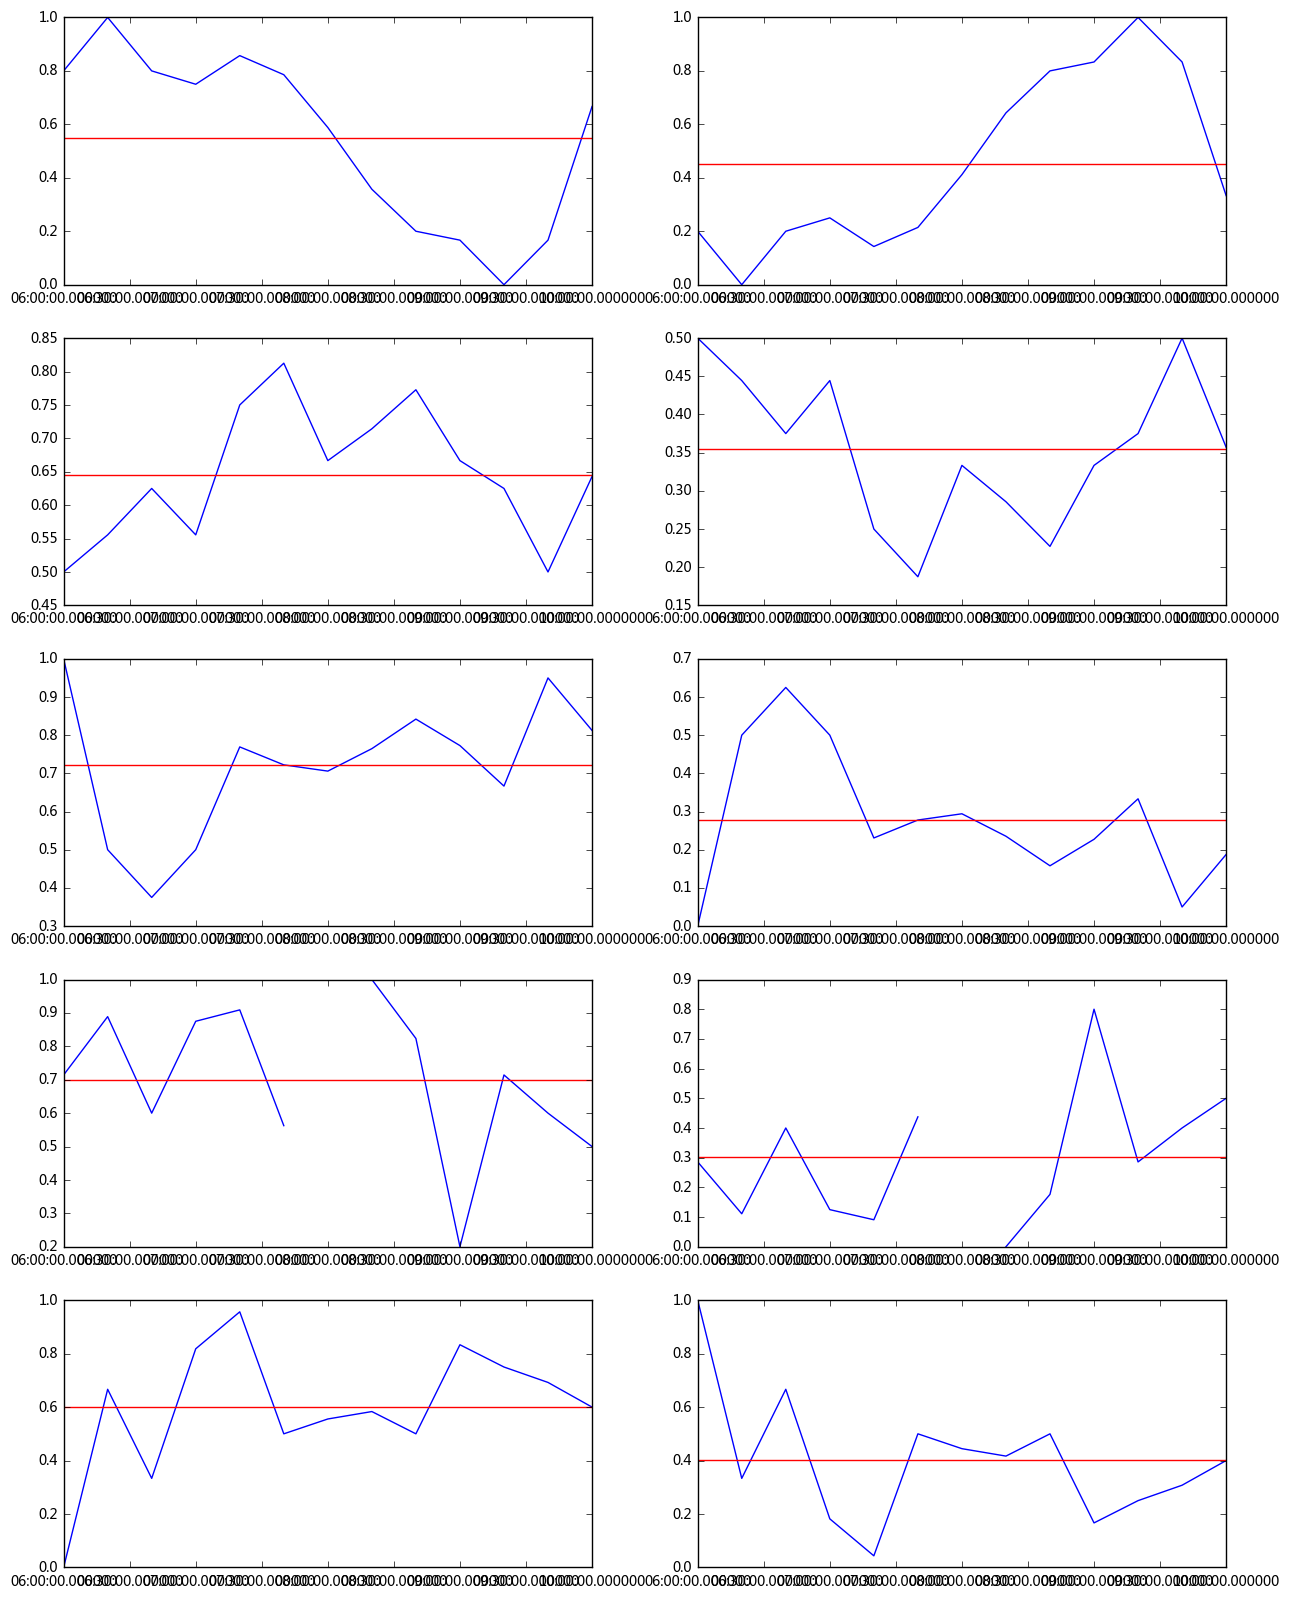

In [51]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

for i in range(5):
    
    count_dict = countEnterFlow('A', start_time, end_time)
    count_df = pd.DataFrame.from_dict(count_dict, orient ='index')
    count_df = count_df.sort_index()
    
    count_df['percent_3'] = count_df[3] / count_df[0]
    count_df['percent_2'] = count_df[2] / count_df[0]
    count_df['percent_1'] = count_df[1] / count_df[0]
    
    #axes[i, 0].plot(count_df.index, count_df['percent_1'])
    axes[i, 0].plot(count_df.index, count_df['percent_2'])
    axes[i, 0].axhline(y=count_df['percent_2'].mean(), linewidth=1, color='r')
    axes[i, 1].plot(count_df.index, count_df['percent_3'])
    axes[i, 1].axhline(y=count_df['percent_3'].mean(), linewidth=1, color='r')
    start_time = start_time + datetime.timedelta(days=7)
    end_time = end_time + datetime.timedelta(days=7)
    
plt.show()

In [26]:
start_time = pd.to_datetime('2016-07-20 06:00:00')
end_time = pd.to_datetime('2016-07-20 10:00:00')

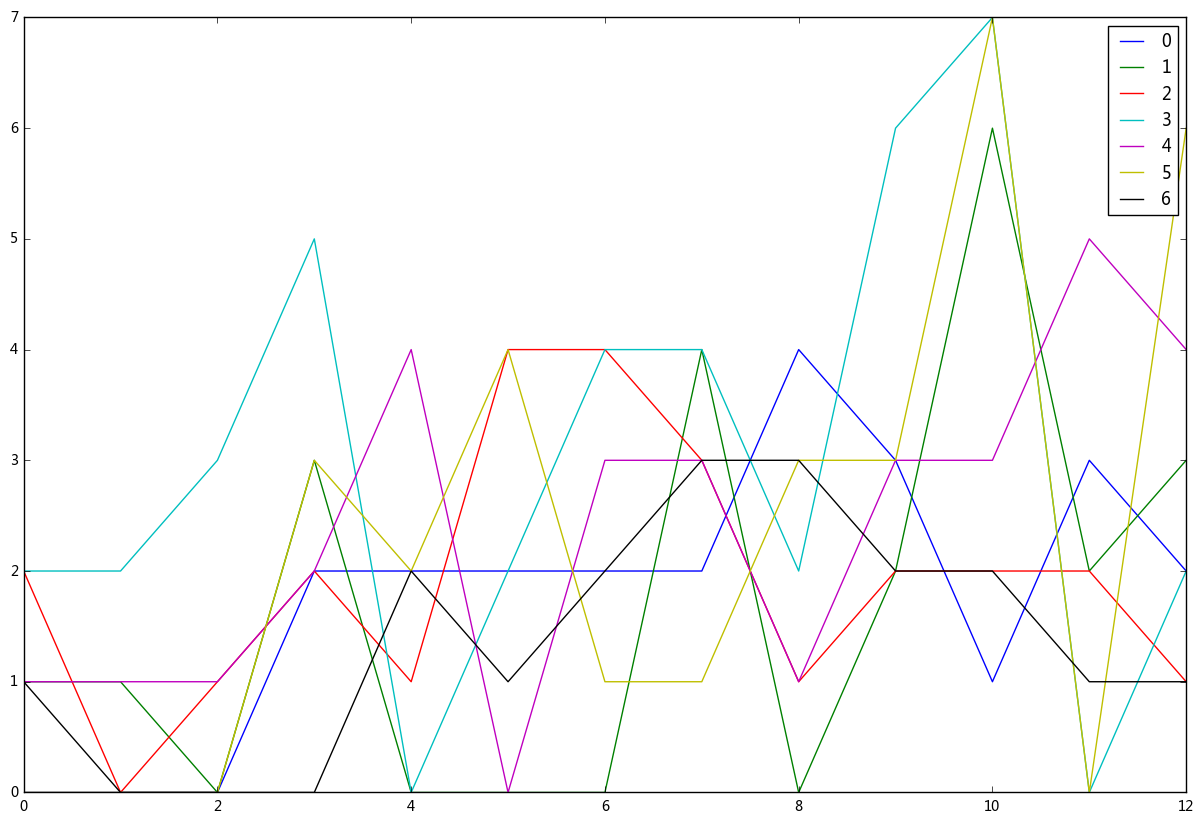

In [27]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

for i in range(7):
    
    count_dict = countEnterFlow('C', start_time, end_time)
    count_df = pd.DataFrame.from_dict(count_dict, orient ='index')
    count_df = count_df.sort_index()
    
    count_df['percent_3'] = count_df[3] / count_df[0]
    count_df['percent_2'] = count_df[2] / count_df[0]
    count_df['percent_1'] = count_df[1] / count_df[0]
    #print(len(count_df.index))
    #axes[i, 0].plot(count_df.index, count_df['percent_1'])
    ax0.plot(np.array(range(13)), count_df[0], label=str(i))
    #ax0.axhline(y=count_df[0].mean(), linewidth=1, color='r')
    ax0.legend()
    start_time = start_time + datetime.timedelta(days=1)
    end_time = end_time + datetime.timedelta(days=1)
    
plt.show()

In [28]:
start_time = pd.to_datetime('2016-07-20 06:00:00')
end_time = pd.to_datetime('2016-07-20 10:00:00')

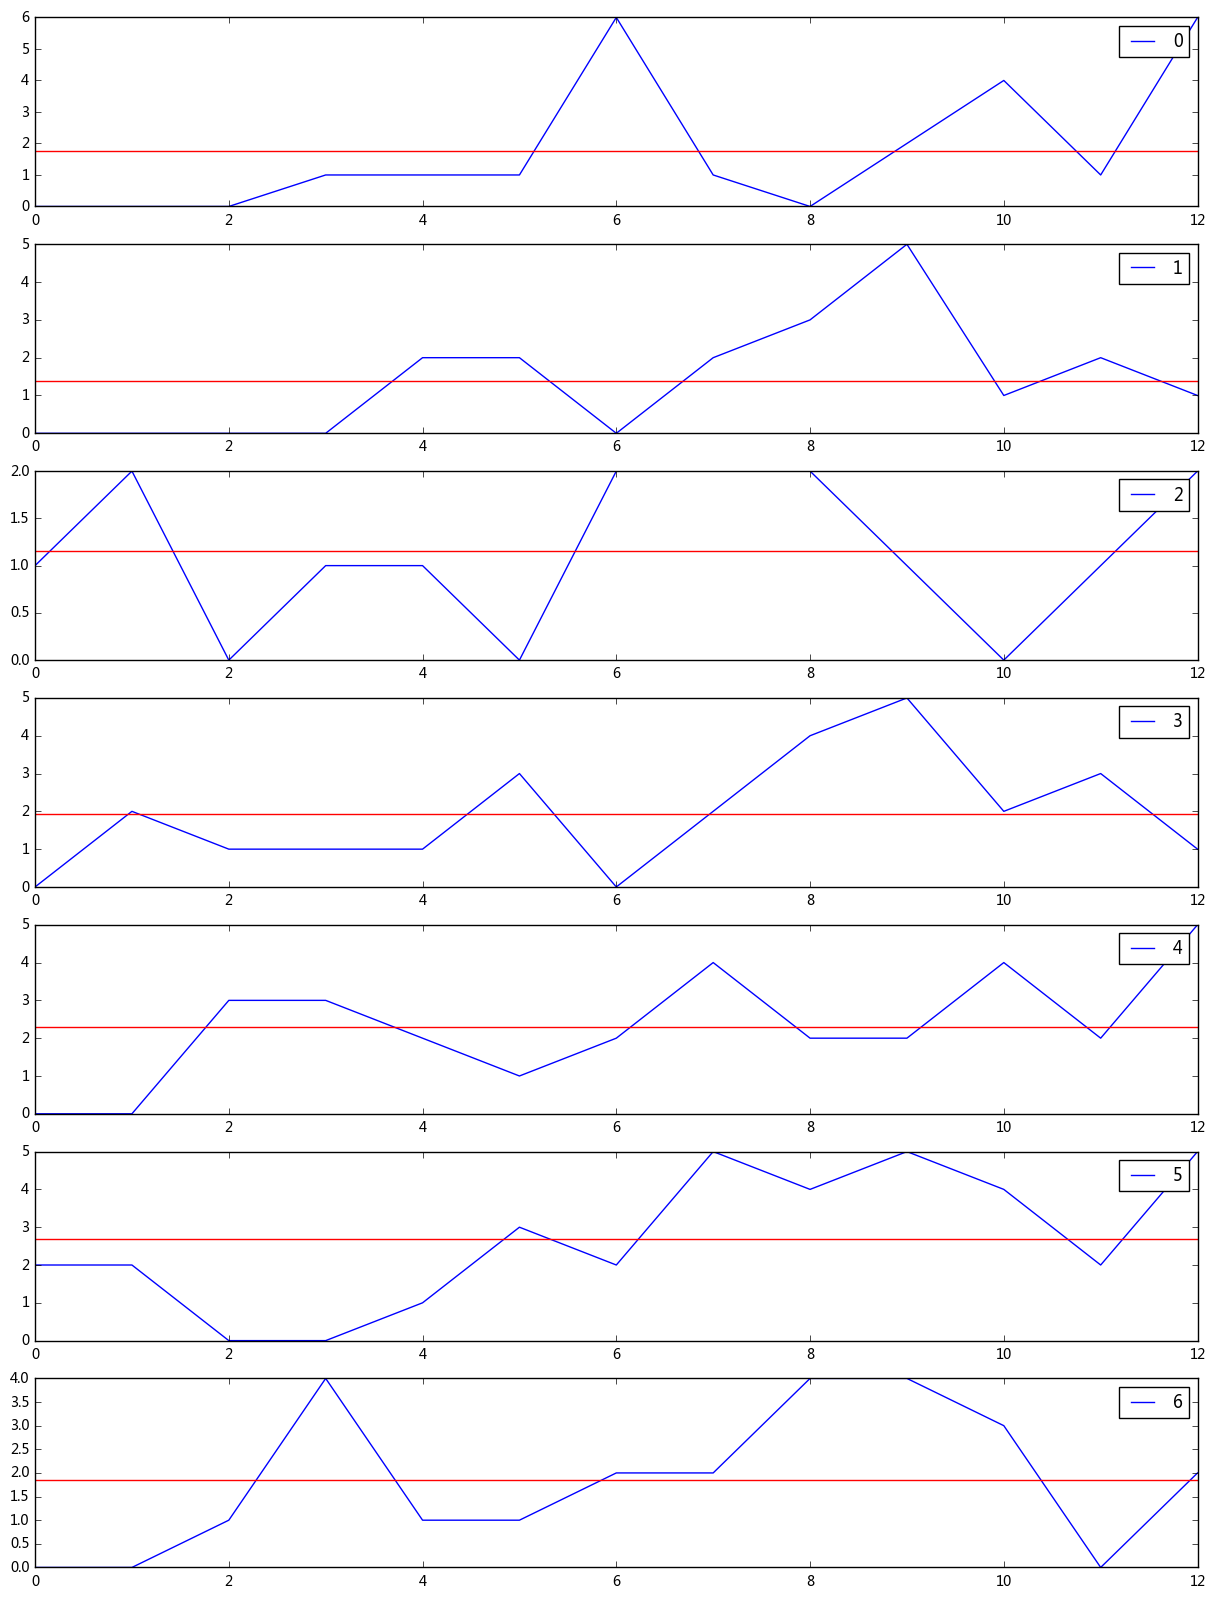

In [31]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 20))

for i in range(7):
    
    count_dict = countEnterFlow('C', start_time, end_time)
    count_df = pd.DataFrame.from_dict(count_dict, orient ='index')
    count_df = count_df.sort_index()
    
    count_df['percent_3'] = count_df[3] / count_df[0]
    count_df['percent_2'] = count_df[2] / count_df[0]
    count_df['percent_1'] = count_df[1] / count_df[0]
    #print(len(count_df.index))
    #axes[i, 0].plot(count_df.index, count_df['percent_1'])
    axes[i].plot(np.array(range(13)), count_df[0], label=str(i))
    axes[i].axhline(y=count_df[0].mean(), linewidth=1, color='r')
    axes[i].legend()
    start_time = start_time + datetime.timedelta(days=1)
    end_time = end_time + datetime.timedelta(days=1)
    
plt.show()